In [25]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import color_sequences as cs
import glob

YEAR = '2018'

In [26]:
paths = glob.glob(f'data\\{YEAR}\\*.csv')
data = pd.concat((pd.read_csv(f) for f in paths), ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          965 non-null    object 
 1   Authors                 881 non-null    object 
 2   Author Affiliations     881 non-null    object 
 3   Publication Title       965 non-null    object 
 4   Date Added To Xplore    965 non-null    object 
 5   Publication Year        965 non-null    int64  
 6   Volume                  965 non-null    int64  
 7   Issue                   965 non-null    int64  
 8   Start Page              965 non-null    object 
 9   End Page                965 non-null    object 
 10  Abstract                965 non-null    object 
 11  ISSN                    965 non-null    object 
 12  ISBNs                   0 non-null      float64
 13  DOI                     965 non-null    object 
 14  Funding Information     626 non-null    ob

In [27]:
data.dropna(how='all', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          965 non-null    object 
 1   Authors                 881 non-null    object 
 2   Author Affiliations     881 non-null    object 
 3   Publication Title       965 non-null    object 
 4   Date Added To Xplore    965 non-null    object 
 5   Publication Year        965 non-null    int64  
 6   Volume                  965 non-null    int64  
 7   Issue                   965 non-null    int64  
 8   Start Page              965 non-null    object 
 9   End Page                965 non-null    object 
 10  Abstract                965 non-null    object 
 11  ISSN                    965 non-null    object 
 12  DOI                     965 non-null    object 
 13  Funding Information     626 non-null    object 
 14  PDF Link                965 non-null    ob

In [28]:
data = data[['Authors', 'Author Affiliations', 'Publication Year', 'Funding Information', 'Author Keywords', 'IEEE Terms']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              881 non-null    object
 1   Author Affiliations  881 non-null    object
 2   Publication Year     965 non-null    int64 
 3   Funding Information  626 non-null    object
 4   Author Keywords      873 non-null    object
 5   IEEE Terms           893 non-null    object
dtypes: int64(1), object(5)
memory usage: 45.4+ KB


In [29]:
data.dropna(subset=['Authors', 'Author Affiliations'], inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              881 non-null    object
 1   Author Affiliations  881 non-null    object
 2   Publication Year     881 non-null    int64 
 3   Funding Information  626 non-null    object
 4   Author Keywords      873 non-null    object
 5   IEEE Terms           879 non-null    object
dtypes: int64(1), object(5)
memory usage: 41.4+ KB


In [30]:
data.to_csv(f'data\\{YEAR}\\aggregate\\combined.csv', encoding='utf-8', index=False)
data.head(5)

,Authors,Author Affiliations,Publication Year,Funding Information,Author Keywords,IEEE Terms
0,M. Nikoufard; A. Nourmohammadi; S. Esmaeili,"Department of Electronics, University of Kasha...",2018,NaN,Bowtie nanoantenna;director;hybrid plasmonic (...,Optical waveguides;Optical device fabrication;...
1,F. Farzami; S. Khaledian; B. Smida; D. Erricolo,Department of Electrical and Computer Engineer...,2018,U.S. National Science Foundation CAREER Award(...,Circular polarization (CP);filtenna;linear pol...,Polarization;Antennas;Shape;P-i-n diodes;Reson...
2,Z. Tao; W. X. Jiang; H. F. Ma; T. J. Cui,"State Key Laboratory of Millimeter Waves, Sout...",2018,National Science Foundation of China(grant num...,High aperture efficiency;high gain;horn-based ...,Lenses;Horn antennas;Aperture antennas;Electri...
3,M. S. Abdallah; Y. Wang; W. M. Abdel-Wahab; S....,"Department of Electrical, Computer and Softwar...",2018,Natural Sciences and Engineering Research Coun...,Dielectric resonator antenna (DRA);millimeter-...,Integrated circuit modeling;Antenna arrays;Imp...
4,P. Lu; D. Voyer; A. Bréard; J. Huillery; B. Al...,"Ampere, CNRS URM 5005, École Centrale de Lyon,...",2018,China Scholarship Council;,Bessel beams;leaky-wave modes;transverse elect...,Microwave antennas;Impedance;Antenna measureme...


In [31]:
countries = []

# with open('auth_aff.txt', 'w', encoding='utf-8') as f:
largest = [0, 0]
for i in range(data.shape[0]):
    authors = data ['Authors'][i].split('; ')
    affiliations = data['Author Affiliations'][i].split('; ')
    largest = [max([largest[0], len(authors)]), i if largest[0] < len(authors) else largest[1]]
    for author, aff in zip(authors, affiliations, strict=True):
        # f.write(f'{author}: {aff}\n')
        if aff == 'NA':
            # pass
            print(author)
        if aff.split(', ')[-1] in ('8410501', 'Xi’an', ):
            print(f'{author}: {aff}')
        countries.append(aff.split(', ')[-1])

Z. Lin: Shaanxi Key Laboratory of Large Scale Electromagnetic Computing, School of Electronic Engineering, Xidian University, Xi’an
X. Zhao: Shaanxi Key Laboratory of Large Scale Electromagnetic Computing, School of Electronic Engineering, Xidian University, Xi’an
Y. Zhang: Shaanxi Key Laboratory of Large Scale Electromagnetic Computing, School of Electronic Engineering, Xidian University, Xi’an
H. Liu: Shaanxi Key Laboratory of Large Scale Electromagnetic Computing, School of Electronic Engineering, Xidian University, Xi’an
Y. Brick: Department of Electrical and Computer Engineering, Ben-Gurion University of the Negev, Beersheba, 8410501


In [32]:
south_korea = ('Republic of Korea', 'Korea', 'KR',)
uae = ('United Arab Emirates',)
turkey = ('Türkiye', 'Türkey', 'TR',)
hong_kong = ('Hong Kong SAR', 'Hong Kong SAR China', 'HK', 'Hong Kong.')
the_netherlands = ('Netherlands', 'The Netherland', 'NL',)
sar_china = ('SAR',)
uk = ('U.K', 'UK', 'United Kingdom', 'WC1E 6BT', 'GB', )
china = ('China,', "People's Republic of China", 'P. R. China', 'China.', 'Fuzhou', 'Shanxi', 'CN', 'Xi’an')
czechia = ('the Czech Republic',)
usa = ('USA.', 'NC', 'NM', 'WI', 'CA', 'VA', 'United States', 'Princeton University', 'Zipreel Inc.', 'Berkeley', 'Massachusetts Institute of Technology', 'US',)
italy = ('Italy.', 'IT',)
macau = ('Macao',)
singapore = ('Nanyang Technological University', 'SG',)
canada = ('Irdeto Canada',)
taiwan = ('ROC', 'R.O.C', 'R.O.C.')
lebanon = ('Louaize',)
ireland = ('Antenna High Frequency Research Centre',)
spain = ('Universidad de Oviedo', 'ES',)
belgium = ('Louvain-la-Neuve', 'BE')
australia = ('AU',)
serbia = ('RS',)
algeria = ('Algérie',)
india = ('IN',)
south_africa = ('ZA',)
thailand = ('TH',)
france = ('FR',)
finland = ('FI',)
japan = ('JP',)
iran = ('IR',)
germany = ('DE',)
denmark = ('DK', )
ivory_coast = ('Cäte d’Ivoire')
israel = ('Beersheba',)

In [33]:
countries = pd.Series(countries, dtype=str)
countries = countries.replace(south_korea, 'South Korea')
countries = countries.replace(uae, 'UAE')
countries = countries.replace(turkey, 'Turkey')
countries = countries.replace(hong_kong, 'Hong Kong')
countries = countries.replace(the_netherlands, 'The Netherlands')
countries = countries.replace(sar_china, 'SAR China')
countries = countries.replace(uk, 'U.K.')
countries = countries.replace(china, 'China')
countries = countries.replace(czechia, 'Czech Republic')
countries = countries.replace(usa, 'USA')
countries = countries.replace(italy, 'Italy')
countries = countries.replace(macau, 'Macau')
countries = countries.replace(singapore, 'Singapore')
countries = countries.replace(canada, 'Canada')
countries = countries.replace(taiwan, 'Taiwan')
countries = countries.replace(lebanon, 'Lebanon')
countries = countries.replace(ireland, 'Ireland')
countries = countries.replace(spain, 'Spain')
countries = countries.replace(belgium, 'Belgium')
countries = countries.replace(australia, 'Australia')
countries = countries.replace(serbia, 'Serbia')
countries = countries.replace(algeria, 'Algeria')
countries = countries.replace(india, 'India')
countries = countries.replace(south_africa, 'South Africa')
countries = countries.replace(thailand, 'Thailand')
countries = countries.replace(france, 'France')
countries = countries.replace(finland, 'Finland')
countries = countries.replace(japan, 'Japan')
countries = countries.replace(iran, 'Iran')
countries = countries.replace(germany, 'Germany')
countries = countries.replace(denmark, 'Denmark')
countries = countries.replace(ivory_coast, 'Ivory Coast')
countries = countries.replace(israel, 'Israel')
print(countries.info())
countries = countries[countries != 'NA']
print(countries.info())
counts = countries.value_counts()
# counts = counts[counts >= 10]
print(counts)
labels = list(counts.keys())
values = list(counts.values)
counts.to_csv('look.csv')

<class 'pandas.core.series.Series'>
RangeIndex: 3310 entries, 0 to 3309
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
3310 non-null   object
dtypes: object(1)
memory usage: 26.0+ KB
None
<class 'pandas.core.series.Series'>
Index: 3310 entries, 0 to 3309
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
3310 non-null   object
dtypes: object(1)
memory usage: 51.7+ KB
None
China              1175
USA                 421
Italy               190
Canada              140
U.K.                101
Spain                95
Iran                 92
France               89
Hong Kong            85
Australia            75
India                72
Japan                64
The Netherlands      64
South Korea          58
Germany              53
Singapore            53
Taiwan               50
Belgium              50
Sweden               42
Finland              40
Denmark              39
Saudi Arabia         23
Greece               23
Portugal             23
Malaysia           

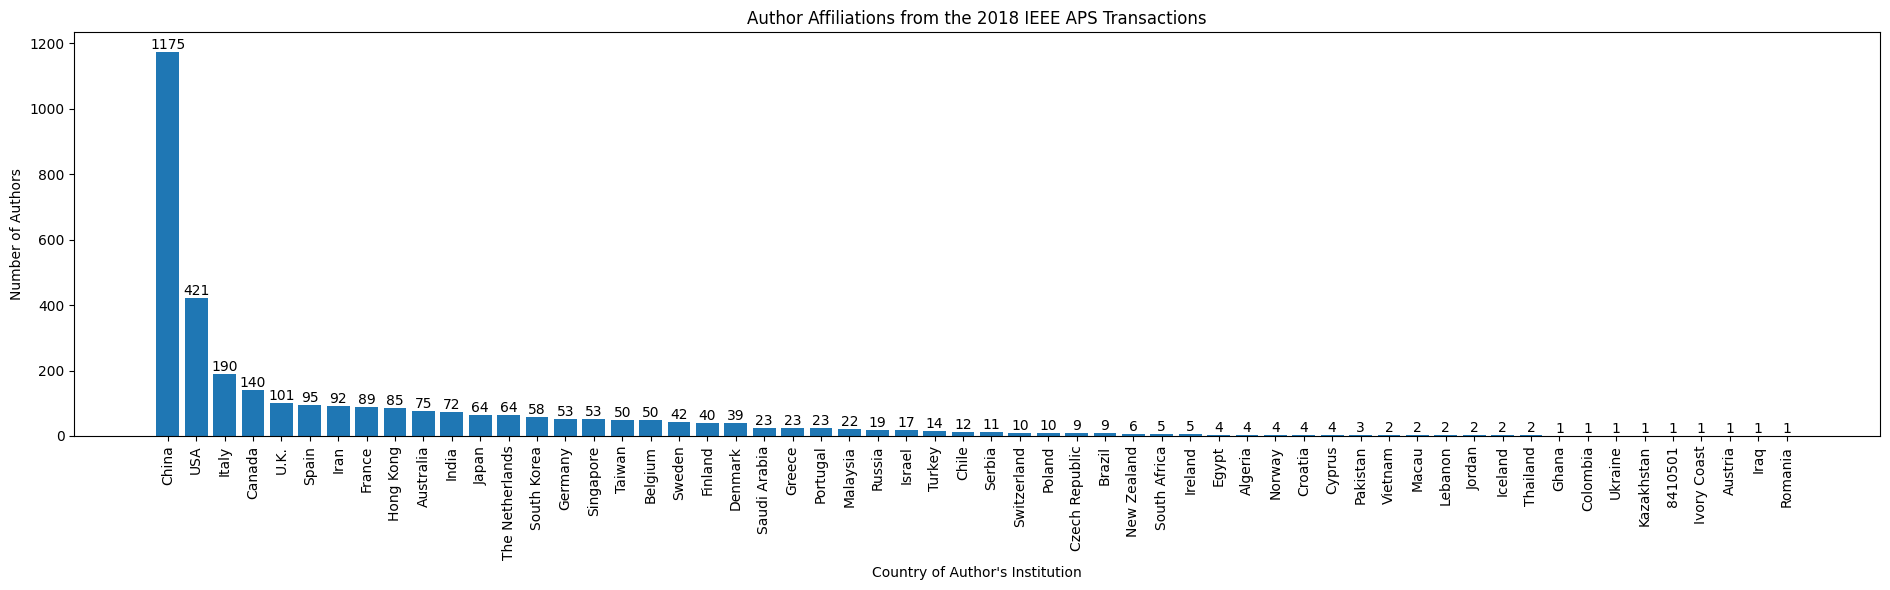

In [34]:
fig, ax = plt.subplots(figsize=(19, 6))
bar_cont = ax.bar(labels, values)
# ax.set(ylim=(0, 1999))
plt.xlabel('Country of Author\'s Institution')
plt.ylabel('Number of Authors')
plt.title(f'Author Affiliations from the {YEAR} IEEE APS Transactions')
plt.xticks(rotation=90)
ax.bar_label(bar_cont)
plt.tight_layout()
plt.savefig(f'figures\\{YEAR}\\{YEAR}_authors_by_country.png', bbox_inches='tight')
plt.show()

In [35]:
super_counts = counts[counts >= 75]
full = counts.sum()
filtered = super_counts.sum()

super_counts['All Other Countries'] = full - filtered

labels = list(super_counts.keys())
values = list(super_counts.values)


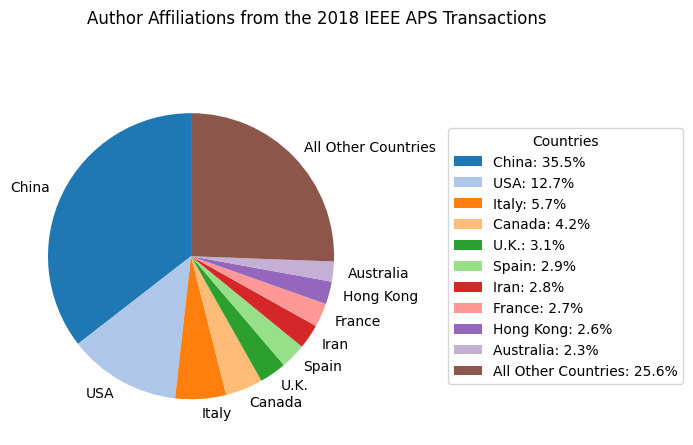

In [36]:

fig, ax = plt.subplots()
wedges, texts = ax.pie(values, labels=labels, startangle=90, colors=cs['tab20'])
percent = [f'{label}: {value/sum(values) * 100:.1f}%' for label, value in zip(labels, values, strict=True)]
ax.legend(wedges, percent, title='Countries', loc='center left', bbox_to_anchor=(1.2, 0, 0.5, 1))
fig.suptitle(f'Author Affiliations from the {YEAR} IEEE APS Transactions')
plt.tight_layout()
plt.savefig(f'figures\\{YEAR}\\{YEAR}_authors_PIE.png', bbox_inches='tight')
plt.show()